In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from geopy import distance

In [4]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv',encoding='utf-8')

In [5]:
#show the first few rows of the DataFrame
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
# Check for missing values
print(df.isnull().sum())

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64


In [8]:
# Remove any rows with missing values
df.dropna(inplace=True)

In [9]:
# Convert the pickup and dropoff coordinates to (lat, long) tuples
pickup_coords = df[['longitude_of_pickup','latitude_of_pickup']].values
dropoff_coords = df[['longitude_of_dropoff','latitude_of_dropoff']].values

In [10]:
# Calculate the distance between pickup and dropoff points using geopy's distance function
distances = [distance.distance(pickup_coords[i], dropoff_coords[i]).km for i in range(len(df))]
df.loc[:, 'distance'] = distances

In [11]:
# Convert pickup_datetime column to datetime type and extract datetime features
df.loc[:, 'date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])
df.loc[:, 'hour'] = df['date_time_of_pickup'].dt.hour
df.loc[:, 'day'] = df['date_time_of_pickup'].dt.day
df.loc[:, 'month'] = df['date_time_of_pickup'].dt.month

In [12]:
# Convert relevant columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce', downcast='float')

In [13]:
df.dtypes

unique_id               float32
amount                  float32
date_time_of_pickup     float32
longitude_of_pickup     float32
latitude_of_pickup      float32
longitude_of_dropoff    float32
latitude_of_dropoff     float32
no_of_passenger         float32
distance                float32
hour                    float32
day                     float32
month                   float32
dtype: object

In [14]:
# Remove any rows with fare_amount <= 0
df = df.loc[df['amount'] > 0]

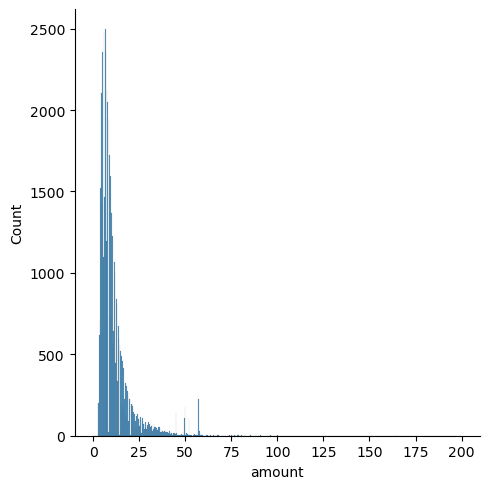

In [15]:
# Plot the distribution of the amount column
sns.displot(df['amount'])

In [16]:
# Remove any rows with amount <= 0
df = df[df['amount'] > 0]

In [17]:
df.drop('unique_id', axis=1)
df.dtypes

unique_id               float32
amount                  float32
date_time_of_pickup     float32
longitude_of_pickup     float32
latitude_of_pickup      float32
longitude_of_dropoff    float32
latitude_of_dropoff     float32
no_of_passenger         float32
distance                float32
hour                    float32
day                     float32
month                   float32
dtype: object

In [18]:
df.fillna(0, inplace=True)  # fill missing values with 0

In [19]:
# Split the data into training and testing sets
X = df.drop('amount', axis=1)
y = df['amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#For rescalling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [21]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [23]:
# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 9.66921


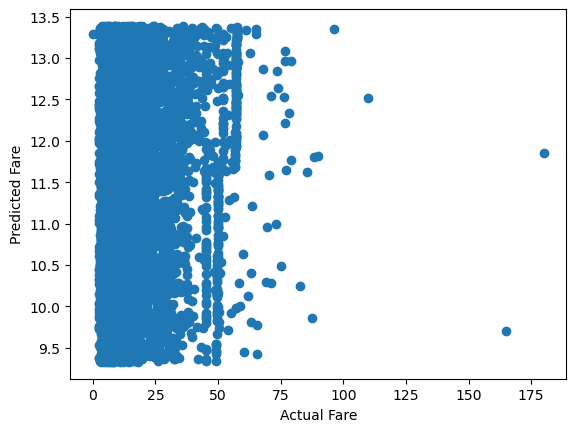

In [24]:
# Plot the predicted vs. actual fares
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.show()